# PROYECTO FINAL DE MACHINE LEARNING
## Realizado por : JUAN CARLOS GUANOLUISA J.
### Objetivo: Es poder predecir el Price de renta de un departamento en base ciertas caracteristicas del mismo:
Consiste en aplicar las técnicas de procesamiento/transformación de variables que mejor se acondicionen al problema,
identificar los modelos que proporcionen prestaciones óptimas, las variables potencialmente más relevantes y la métrica 
adecuada para contrastar los distintos modelos. 
Como las posibilidades son amplias, se va a abordar una aproximación incremental: comenzar por soluciones sencillas 
para progresivamente aumentar la complejidad de las técnicas utilizadas  a modelos mas complejos

## Setup
Entre las cosas importantes que se necesita hacer en asegurarnos que las librerias que necesitamos para el trabajo sean las correctas, como>
Matplotlib, Python 3.5 o superior, y Scikit-Learn se mayor a 2.20. y seteamos el ambiente para el despliqgue de los graficos con Matplotlib.

In [1]:
# Python ≥3.5 es requerido como minimo
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 es requerido
import sklearn
assert sklearn.__version__ >= "0.20"

# Importamos librerias comunes
import numpy as np
import pandas as pd

# Para plotear los graficos dentro del NoteBook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Cargamos nuestro Data Set de AirBnB

In [2]:
full_df = pd.read_csv('./airbnb-listings-extract.csv', sep=';', decimal='.')
df = full_df

In [3]:
# Tomamos una mirada rapida de los datos que hemos cargado
df.head(2)

ID                            Listing Url       Scrape ID  \
0  11210388  https://www.airbnb.com/rooms/11210388  20170306202425   
1  17471131  https://www.airbnb.com/rooms/17471131  20170407214050   

  Last Scraped                            Name  \
0   2017-03-07  The Loft-Full Bath-Deck w/View   
1   2017-04-08      Claris I, Friendly Rentals   

                                             Summary  \
0  Loft in the Hill country 12-15 minutes directl...   
1  This apartment has: 1 double bed, 1 double sof...   

                                               Space  \
0  This loft has a spectacular view of the hills ...   
1  This apartment has: 1 double bed, 1 double sof...   

                                         Description Experiences Offered  \
0  Loft in the Hill country 12-15 minutes directl...                none   
1  This apartment has: 1 double bed, 1 double sof...                none   

                               Neighborhood Overview  ...  \
0  This neighborhood is located in the hills west...  ...   
1  Plaza   Cataluña Catalonia Square is the large...  ...   

  Review Scores Communication Review Scores Location Review Scores Value  \
0                        10.0                   10.0                10.0   
1                        10.0                    8.0                10.0   

       License Jurisdiction Names Cancellation Policy  \
0          NaN                NaN            moderate   
1  HUTB-006721                NaN     super_strict_30   

  Calculated host listings count Reviews per Month  \
0                            1.0              3.50   
1                          106.0              0.86   

                    Geolocation  \
0  30.3373609355,-97.8632766782   
1   41.3896829422,2.17262543017   

                                            Features  
0  Host Is Superhost,Host Has Profile Pic,Host Id...  
1  Host Has Profile Pic,Requires License,Instant ...  

[2 rows x 89 columns]

In [4]:
df.info()
# Vemos que el data set esta compuesto de 89 Features, existen muchas columnas que en sus valores casi solo tienen valores Null, hay mucho trabajo de limpieza de datos, 
# antes de poder aplicar cualquier algoritmo de regresion.
# Al analizar que features podrian podrian contribuir a primera vista al Precio del renta uno pensaria que es el tamanio, pero en el Dataset se puede ver "Square Feet" tiene
# apenas 474 valores de 11824, lo que muestra que no es un buen indicador que nos de una pista segura para predecir el precio.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              14780 non-null  int64  
 1   Listing Url                     14780 non-null  object 
 2   Scrape ID                       14780 non-null  int64  
 3   Last Scraped                    14780 non-null  object 
 4   Name                            14779 non-null  object 
 5   Summary                         14189 non-null  object 
 6   Space                           10888 non-null  object 
 7   Description                     14774 non-null  object 
 8   Experiences Offered             14780 non-null  object 
 9   Neighborhood Overview           9134 non-null   object 
 10  Notes                           5644 non-null   object 
 11  Transit                         9066 non-null   object 
 12  Access                          

## Realizamos una analisis exploratorio inicial

### Bueno sigamos con el analisis del DataSet
- Necesito saber que pais tiene la mayor cantidad de data para permitir que el algoritmo pueda entrenarse de forma apropiada con la data suficiente, para esto vamos a hacer un ploteo por Pais usando las barras

In [5]:
dataP = df["Country"].value_counts()

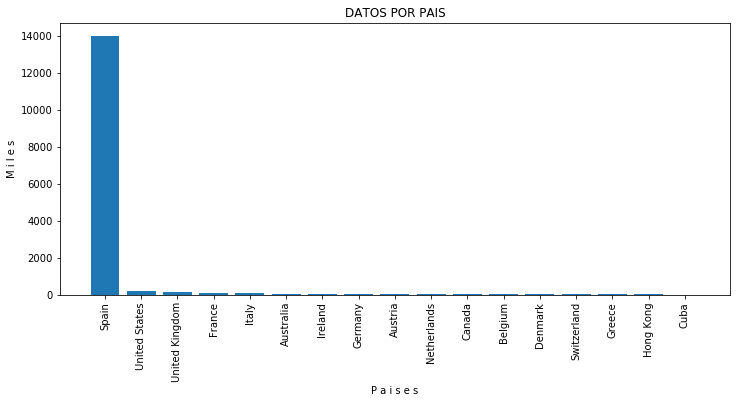

In [6]:
import matplotlib as mpl
mpl.rc('axes', labelsize=10)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)
fig, ax = plt.subplots(figsize=(12,5))
ax.set_title('DATOS POR PAIS')
ax.set_ylabel('M i l e s')
ax.set_xlabel('P a i s e s')
ax.set_xticklabels(dataP.index, rotation=90)
plot = ax.bar(dataP.index, dataP.values)
plt.show()

In [7]:
# Del grafico anterior podemos ver que Spain es el pais que mas datos tienen de precios de departamentos de AirBnB, con lo cual vamos a seleccionar solo los datos 
# de ese pais para luego ver que Ciudad es la que mas data tiene y seleccionamos solo esa y que tengan para aplicar un modelo predictivo de Precios, como vemos
# Finalmente nos vamos a quedar con Madrid que es la ciudad de Espana que tiene mas datos

In [8]:
dataC = df["City"].value_counts()
dataC

Madrid            13207
Barcelona           292
London              132
Paris               108
马德里                  52
                  ...  
Madri                 1
Port de Soller        1
Mascot                1
Onil                  1
San Lázaro            1
Name: City, Length: 246, dtype: int64

In [9]:
# dfMadrid = df[(df.Country == 'Spain') & (df.City == 'Madrid') & (df["Neighbourhood Cleansed"] == 'Embajadores')]
dfMadrid = df[(df.Country == 'Spain') & (df.City == 'Madrid')]
dfMadrid.shape
dataN = dfMadrid["Neighbourhood Cleansed"].value_counts()

In [10]:
# Vemos que datos categoricos y numericos podemos usar
# Veamos tpimero los categoricos

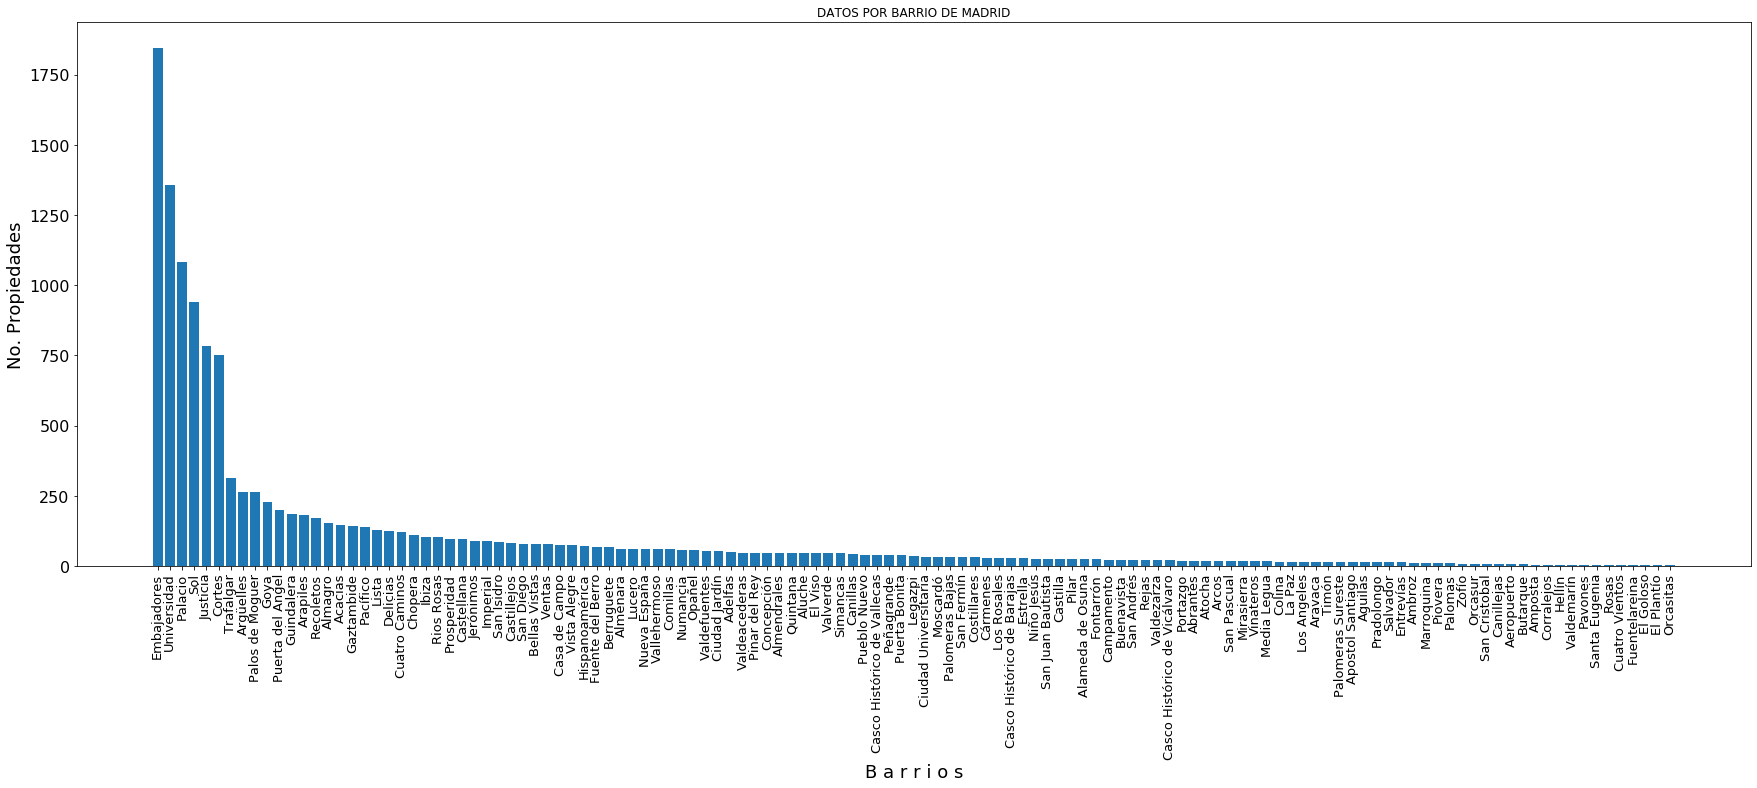

In [11]:
mpl.rc('axes', labelsize=18)
mpl.rc('xtick', labelsize=13)
mpl.rc('ytick', labelsize=16)
fig, ax = plt.subplots(figsize=(30,10))
ax.set_title('DATOS POR BARRIO DE MADRID')
ax.set_ylabel('No. Propiedades')
ax.set_xlabel('B a r r i o s')
ax.set_xticklabels(dataN.index, rotation=90)
plot = ax.bar(dataN.index, dataN.values)
plt.show()

In [12]:
dfMadrid["Neighbourhood Cleansed"].value_counts()

Embajadores       1844
Universidad       1358
Palacio           1083
Sol                940
Justicia           785
                  ... 
Cuatro Vientos       3
Fuentelareina        3
El Goloso            3
El Plantío           3
Orcasitas            2
Name: Neighbourhood Cleansed, Length: 125, dtype: int64

In [13]:
# Sacamos una copia para no danar los datos de Train
# trainAirbnb = train.copy()
trainAirbnb = dfMadrid.copy()

## Visualizacion Geografica de los datos en Madrid
Realizamos un ploteo para ver como estan distribuidos los departamentos en Madrid

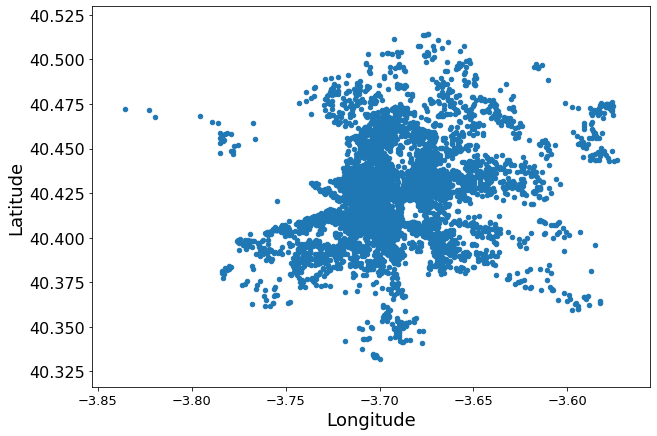

In [14]:
trainAirbnb.plot(kind="scatter", x="Longitude", y="Latitude", figsize=(10,7))

En este mapa podemos ver donde se encuentran concetrados la mayoria de los departamentos en la ciudad de Madrid

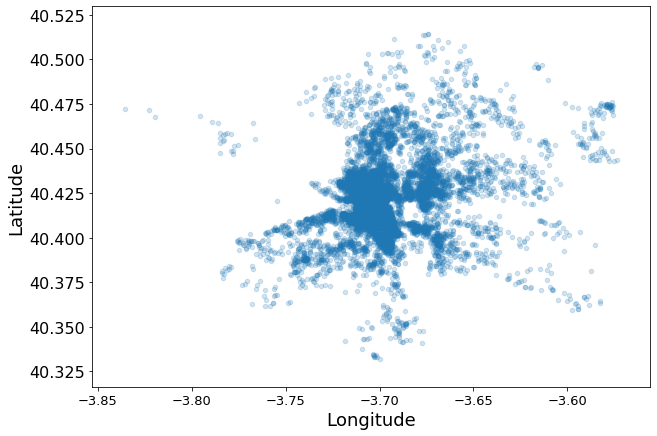

In [15]:
trainAirbnb.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.2, figsize=(10,7))

En este grafico podemos ver donde se encuentran los precios mas altos en la ciudad de Madrid

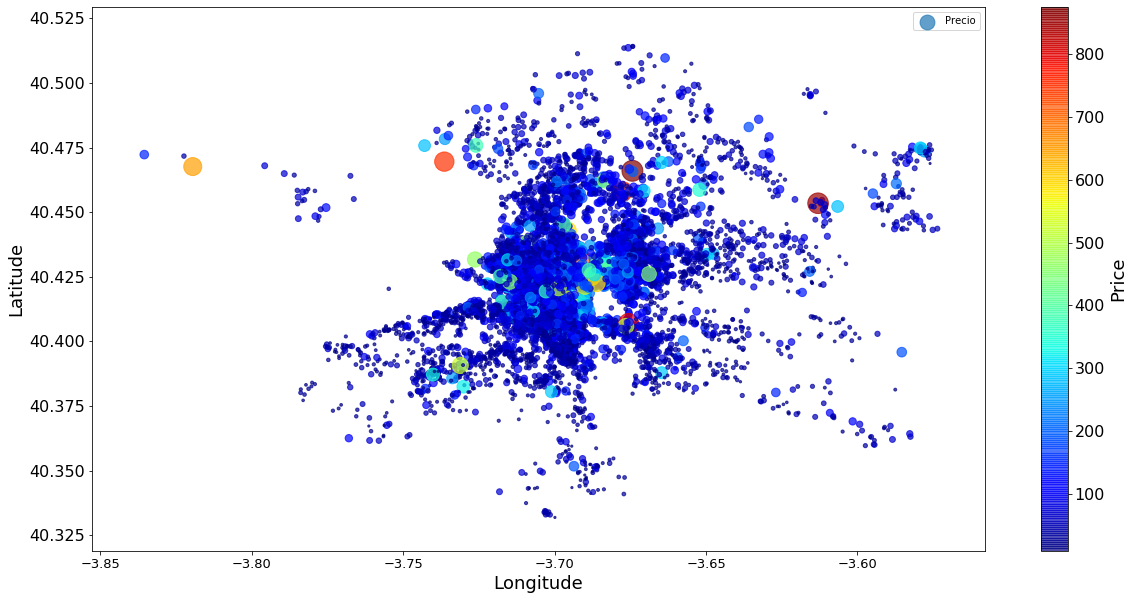

In [16]:
trainAirbnb.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.7,
             s=trainAirbnb["Price"]/2, label="Precio", figsize=(20,10),
             c="Price", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

## Separamos los datos de Train y Test

Es importante realizar este paso antes de aplicar cualquier proceso de transformacion de los datos para tener la seguridad de que al momento
de evaluar la exactitud del modelo con datos nuevos veamos la exactitud del modelo al momento de predecir un valor de renta de un departamento

In [17]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(dfMadrid, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./trainMadrid.csv', sep=';', decimal='.', index=False)
test.to_csv('./testMadrid.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

dfM = pd.read_csv('./trainMadrid.csv', sep=';', decimal='.')


Dimensiones del dataset de training: (10565, 89)
Dimensiones del dataset de test: (2642, 89)


C:\Software\Instalado\miniconda3\envs\keepcoding-Ml-py-3.7.9\lib\site-packages\IPython\core\interactiveshell.py:3173: DtypeWarning: Columns (40) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Aplicamos Feature Engenieering

El objetivo de aplicar esta metodologia a cada una de los features es con el objetivo de evaluar la calidad de los datos y ver si se
requiere realizar una limpieza de los datos

Vamos a dividir en train/test y guardar cada cosa en un CSV diferente, así luego podemos analizarlo con pandas utilizando train_test_split de Scikit-Learn
La idea es crear dos archivos completamente separados para que el modelo nunca vea los datos de Test y asi poder asegurar que los resultados sean mas confiables.

Despues de separar la data en Train y Test vamos a aplicar limpieza de datos y Feature Ingeneering sobre los datos de Train para entrenar el modelo y el mismo proceso lo aplicaremos a los datos de Test antes de evaluar los resultados del modelo

In [18]:
# Graficamos la data de forma Geografica 
trainAirbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13207 entries, 40 to 14757
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              13207 non-null  int64  
 1   Listing Url                     13207 non-null  object 
 2   Scrape ID                       13207 non-null  int64  
 3   Last Scraped                    13207 non-null  object 
 4   Name                            13207 non-null  object 
 5   Summary                         12719 non-null  object 
 6   Space                           9645 non-null   object 
 7   Description                     13201 non-null  object 
 8   Experiences Offered             13207 non-null  object 
 9   Neighborhood Overview           8269 non-null   object 
 10  Notes                           5006 non-null   object 
 11  Transit                         8220 non-null   object 
 12  Access                         

### Seleccionamos las columnas mas representativas para este proceso

In [19]:
# Eliminamos las no aportan para esta prediccion de precio 
trainAirbnb = trainAirbnb.drop(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About','Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Verifications', 'Street',
       'Neighbourhood', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Amenities', 'Square Feet', 
       'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included',
       'Calendar Updated', 'Has Availability', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Calendar last Scraped',
       'First Review', 'Last Review','License', 'Jurisdiction Names',
       'Cancellation Policy', 'Calculated host listings count',
       'Reviews per Month', 'Geolocation', 'Features', 'City','Neighbourhood Group Cleansed',
        'Host Response Time'], axis=1)
trainAirbnb.head(5)

Host Response Rate  Host Listings Count  Host Total Listings Count  \
40                84.0                  3.0                        3.0   
41               100.0                  1.0                        1.0   
42               100.0                  2.0                        2.0   
43               100.0                  8.0                        8.0   
44               100.0                  2.0                        2.0   

   Neighbourhood Cleansed   Latitude  Longitude Property Type  \
40             Niño Jesús  40.406953  -3.670894     Apartment   
41              Recoletos  40.425904  -3.681647     Apartment   
42              Recoletos  40.428352  -3.687155     Apartment   
43              Recoletos  40.427454  -3.685763     Apartment   
44              Recoletos  40.428671  -3.685423     Apartment   

          Room Type  Accommodates  Bathrooms  ...  Minimum Nights  \
40     Private room             2        2.0  ...               1   
41  Entire home/apt             2        1.0  ...               2   
42  Entire home/apt             3        1.0  ...               2   
43     Private room             1        1.0  ...               7   
44  Entire home/apt             6        1.0  ...               2   

    Maximum Nights Number of Reviews  Review Scores Rating  \
40            1125               171                  87.0   
41            1125                52                  96.0   
42            1125                36                  87.0   
43            1125                15                  95.0   
44            1125                 0                   NaN   

    Review Scores Accuracy  Review Scores Cleanliness  Review Scores Checkin  \
40                     9.0                        9.0                    9.0   
41                    10.0                       10.0                   10.0   
42                     9.0                        9.0                   10.0   
43                    10.0                        9.0                   10.0   
44                     NaN                        NaN                    NaN   

    Review Scores Communication  Review Scores Location  Review Scores Value  
40                          9.0                     9.0                  9.0  
41                         10.0                    10.0                 10.0  
42                         10.0                    10.0                  9.0  
43                         10.0                    10.0                  9.0  
44                          NaN                     NaN                  NaN  

[5 rows x 25 columns]

In [20]:
# Nos quedamos con un dataset mas pequeno en columnas
trainAirbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13207 entries, 40 to 14757
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Host Response Rate           11552 non-null  float64
 1   Host Listings Count          13204 non-null  float64
 2   Host Total Listings Count    13204 non-null  float64
 3   Neighbourhood Cleansed       13207 non-null  object 
 4   Latitude                     13207 non-null  float64
 5   Longitude                    13207 non-null  float64
 6   Property Type                13207 non-null  object 
 7   Room Type                    13207 non-null  object 
 8   Accommodates                 13207 non-null  int64  
 9   Bathrooms                    13158 non-null  float64
 10  Bedrooms                     13184 non-null  float64
 11  Beds                         13158 non-null  float64
 12  Bed Type                     13207 non-null  object 
 13  Price          

Realimos algunos analisis sobre estos campos para ver que tanto pueden aportar al proceso de predecir un Precio, ya que algunos tienden a tener
alta colinealidad.

'Interaction', 'House Rules',"Host Response Time", 'Host Response Rate',
'Street', para sacar el nombre del barrio
'State' 
'Property Type' muy importante
'Room Type' muy importante
'Bed Type' nuy importante
'Review Scores Location' muy importante
'Review Scores Value' muy importante
'Cancellation Policy' muy importante

### Renombramos los nombres de las Columnas del Data Frame

In [21]:
trainAirbnb.columns

Index(['Host Response Rate', 'Host Listings Count',
       'Host Total Listings Count', 'Neighbourhood Cleansed', 'Latitude',
       'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms',
       'Bedrooms', 'Beds', 'Bed Type', 'Price', 'Extra People',
       'Minimum Nights', 'Maximum Nights', 'Number of Reviews',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value'],
      dtype='object')

In [22]:
trainAirbnb.rename(columns={
       'Host Response Rate': 'HostResponseRate', 
       'Host Listings Count': 'HostListingsCount',
       'Host Total Listings Count': 'HostTotalListingsCount', 
       'Neighbourhood Cleansed': 'NeighbourhoodCleansed', 
       'Property Type': 'PropertyType', 
       'Room Type': 'RoomType', 
       'Bed Type': 'BedType', 
       'Extra People': 'ExtraPeople',
       'Minimum Nights': 'MinimumNights', 
       'Maximum Nights': 'MaximumNights', 
       'Number of Reviews': 'NumberOfReviews',
       'Review Scores Rating': 'ReviewScoresRating', 
       'Review Scores Accuracy': 'ReviewScoresAccuracy',
       'Review Scores Cleanliness': 'ReviewScoresCleanliness', 
       'Review Scores Checkin': 'ReviewScoresCheckin',
       'Review Scores Communication': 'ReviewScoresCommunication', 
       'Review Scores Location': 'ReviewScoresLocation',
       'Review Scores Value': 'ReviewScoresValue', 
    }, inplace=True,
    )

In [23]:
trainAirbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13207 entries, 40 to 14757
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   HostResponseRate           11552 non-null  float64
 1   HostListingsCount          13204 non-null  float64
 2   HostTotalListingsCount     13204 non-null  float64
 3   NeighbourhoodCleansed      13207 non-null  object 
 4   Latitude                   13207 non-null  float64
 5   Longitude                  13207 non-null  float64
 6   PropertyType               13207 non-null  object 
 7   RoomType                   13207 non-null  object 
 8   Accommodates               13207 non-null  int64  
 9   Bathrooms                  13158 non-null  float64
 10  Bedrooms                   13184 non-null  float64
 11  Beds                       13158 non-null  float64
 12  BedType                    13207 non-null  object 
 13  Price                      13198 non-null  fl

In [24]:
#trainAirbnb['ReviewScoresRating'].value_counts()
#trainAirbnb['ReviewScoresRating'].mean()
#trainAirbnb['Beds'].median()

In [25]:
# Aplicamos medidas de tendencia central a las columnas numericas para llenar aquellos campos con valores Nan
trainAirbnb['HostResponseRate'] = trainAirbnb['HostResponseRate'].fillna(round(trainAirbnb['HostResponseRate'].mean()))
trainAirbnb['HostListingsCount'] = trainAirbnb['HostListingsCount'].fillna(round(trainAirbnb['HostListingsCount'].mean()))
trainAirbnb['HostTotalListingsCount'] = trainAirbnb['HostTotalListingsCount'].fillna(round(trainAirbnb['HostTotalListingsCount'].mean()))
trainAirbnb['Bathrooms'] = trainAirbnb['Bathrooms'].fillna(trainAirbnb['Bathrooms'].median())
trainAirbnb['Bedrooms'] = trainAirbnb['Bedrooms'].fillna(trainAirbnb['Bedrooms'].median())
trainAirbnb['Beds'] = trainAirbnb['Beds'].fillna(trainAirbnb['Beds'].median())
trainAirbnb['Price'] = trainAirbnb['Price'].fillna(round(trainAirbnb['Price'].mean()))
trainAirbnb['ReviewScoresRating'] = trainAirbnb['ReviewScoresRating'].fillna(round(trainAirbnb['ReviewScoresRating'].mean()))
trainAirbnb['ReviewScoresAccuracy'] = trainAirbnb['ReviewScoresAccuracy'].fillna(round(trainAirbnb['ReviewScoresAccuracy'].mean()))
trainAirbnb['ReviewScoresCleanliness'] = trainAirbnb['ReviewScoresCleanliness'].fillna(round(trainAirbnb['ReviewScoresCleanliness'].mean()))
trainAirbnb['ReviewScoresCheckin'] = trainAirbnb['ReviewScoresCheckin'].fillna(round(trainAirbnb['ReviewScoresCheckin'].mean()))
trainAirbnb['ReviewScoresCommunication'] = trainAirbnb['ReviewScoresCommunication'].fillna(round(trainAirbnb['ReviewScoresCommunication'].mean()))
trainAirbnb['ReviewScoresLocation'] = trainAirbnb['ReviewScoresLocation'].fillna(round(trainAirbnb['ReviewScoresLocation'].mean()))
trainAirbnb['ReviewScoresValue'] = trainAirbnb['ReviewScoresValue'].fillna(round(trainAirbnb['ReviewScoresValue'].mean()))


In [26]:
trainAirbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13207 entries, 40 to 14757
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   HostResponseRate           13207 non-null  float64
 1   HostListingsCount          13207 non-null  float64
 2   HostTotalListingsCount     13207 non-null  float64
 3   NeighbourhoodCleansed      13207 non-null  object 
 4   Latitude                   13207 non-null  float64
 5   Longitude                  13207 non-null  float64
 6   PropertyType               13207 non-null  object 
 7   RoomType                   13207 non-null  object 
 8   Accommodates               13207 non-null  int64  
 9   Bathrooms                  13207 non-null  float64
 10  Bedrooms                   13207 non-null  float64
 11  Beds                       13207 non-null  float64
 12  BedType                    13207 non-null  object 
 13  Price                      13207 non-null  fl

In [27]:
# Transformamos los tipos de datos a valores numericos

soloInt=trainAirbnb.select_dtypes(include=['int64'])
soloFloat=trainAirbnb.select_dtypes(include=['float64'])
soloObjeto=trainAirbnb.select_dtypes(include=['object'])

print(soloInt.columns)
print(soloFloat.columns)
print(soloObjeto.columns)


Index(['Accommodates', 'ExtraPeople', 'MinimumNights', 'MaximumNights',
       'NumberOfReviews'],
      dtype='object')
Index(['HostResponseRate', 'HostListingsCount', 'HostTotalListingsCount',
       'Latitude', 'Longitude', 'Bathrooms', 'Bedrooms', 'Beds', 'Price',
       'ReviewScoresRating', 'ReviewScoresAccuracy', 'ReviewScoresCleanliness',
       'ReviewScoresCheckin', 'ReviewScoresCommunication',
       'ReviewScoresLocation', 'ReviewScoresValue'],
      dtype='object')
Index(['NeighbourhoodCleansed', 'PropertyType', 'RoomType', 'BedType'], dtype='object')


In [28]:
#trainAirbnb['RoomType'].unique()
#trainAirbnb['BedType'].value_counts()

In [29]:
# Sacamos un respaldo del Data Set para iniciar el proceso de Encoding de las columnas numericas y texto ya que los algortimos de MAchine Learning
# normalmente procesan datos solo numricos

trainHot = trainAirbnb.copy()


## Vamos a usar Mean Encoding
Para procesar las columnas categoricas que finalmente quedaron de nuestro data set
### .- NeighbourhoodCleansed

In [30]:
# Sacamos el promedio total de la variable Price
precioPromedio = trainHot['Price'].mean()


In [31]:
# Calculamos los valores y el promedio de cada grupo de Barrio
agg = trainHot.groupby('NeighbourhoodCleansed')['Price'].agg(['count', 'mean'])
counts = agg['count']
means = agg['mean']
peso = 100
# Calculamos el precio mas suavisado
smooth = (counts * means + peso * precioPromedio)/(counts + peso)
trainHot.loc[:, 'NeighbourhoodEncoded'] = trainHot['NeighbourhoodCleansed'].map(smooth)

### .- PropertyType

In [32]:
# Calculamos los valores y el promedio de cada grupo de Barrio
agg = trainHot.groupby('PropertyType')['Price'].agg(['count', 'mean'])
counts = agg['count']
means = agg['mean']
peso = 100
# Calculamos el precio mas suavisado
smooth = (counts * means + peso * precioPromedio)/(counts + peso)
trainHot.loc[:, 'PropertyTypeEncoded'] = trainHot['PropertyType'].map(smooth)


In [33]:
trainHot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13207 entries, 40 to 14757
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   HostResponseRate           13207 non-null  float64
 1   HostListingsCount          13207 non-null  float64
 2   HostTotalListingsCount     13207 non-null  float64
 3   NeighbourhoodCleansed      13207 non-null  object 
 4   Latitude                   13207 non-null  float64
 5   Longitude                  13207 non-null  float64
 6   PropertyType               13207 non-null  object 
 7   RoomType                   13207 non-null  object 
 8   Accommodates               13207 non-null  int64  
 9   Bathrooms                  13207 non-null  float64
 10  Bedrooms                   13207 non-null  float64
 11  Beds                       13207 non-null  float64
 12  BedType                    13207 non-null  object 
 13  Price                      13207 non-null  fl

## Vamos a usar Label Encoding
Para procesar las columnas Categoricas
### RoomType

In [34]:
from sklearn.preprocessing import LabelEncoder
trainHot['RoomTypeEncoded'] = LabelEncoder().fit_transform(trainHot.RoomType)
trainHot['BedTypeEncoded'] = LabelEncoder().fit_transform(trainHot.BedType)

In [35]:
# Sacamos un respaldo del Data Set
trainAirBnbLimpio = trainHot.copy()

In [36]:
trainAirBnbLimpio = trainAirBnbLimpio.drop(['NeighbourhoodCleansed', 'PropertyType', 'RoomType', 'BedType'], axis=1)
trainAirBnbLimpio.head(5)

HostResponseRate  HostListingsCount  HostTotalListingsCount   Latitude  \
40              84.0                3.0                     3.0  40.406953   
41             100.0                1.0                     1.0  40.425904   
42             100.0                2.0                     2.0  40.428352   
43             100.0                8.0                     8.0  40.427454   
44             100.0                2.0                     2.0  40.428671   

    Longitude  Accommodates  Bathrooms  Bedrooms  Beds  Price  ...  \
40  -3.670894             2        2.0       1.0   1.0   28.0  ...   
41  -3.681647             2        1.0       0.0   1.0   58.0  ...   
42  -3.687155             3        1.0       0.0   2.0   70.0  ...   
43  -3.685763             1        1.0       1.0   1.0   26.0  ...   
44  -3.685423             6        1.0       2.0   3.0   70.0  ...   

    ReviewScoresAccuracy  ReviewScoresCleanliness  ReviewScoresCheckin  \
40                   9.0                      9.0                  9.0   
41                  10.0                     10.0                 10.0   
42                   9.0                      9.0                 10.0   
43                  10.0                      9.0                 10.0   
44                   9.0                      9.0                 10.0   

    ReviewScoresCommunication  ReviewScoresLocation  ReviewScoresValue  \
40                        9.0                   9.0                9.0   
41                       10.0                  10.0               10.0   
42                       10.0                  10.0                9.0   
43                       10.0                  10.0                9.0   
44                       10.0                  10.0                9.0   

    NeighbourhoodEncoded  PropertyTypeEncoded  RoomTypeEncoded  BedTypeEncoded  
40             65.908521            67.650844                1               4  
41            110.714977            67.650844                0               4  
42            110.714977            67.650844                0               4  
43            110.714977            67.650844                1               4  
44            110.714977            67.650844                0               4  

[5 rows x 25 columns]

In [37]:
trainAirBnbLimpio.describe().T

count        mean          std        min  \
HostResponseRate           13207.0   94.846521    14.261177   0.000000   
HostListingsCount          13207.0    9.813811    27.574682   0.000000   
HostTotalListingsCount     13207.0    9.813811    27.574682   0.000000   
Latitude                   13207.0   40.420548     0.020032  40.331888   
Longitude                  13207.0   -3.697143     0.023341  -3.835498   
Accommodates               13207.0    3.191035     1.991330   1.000000   
Bathrooms                  13207.0    1.251798     0.598783   0.000000   
Bedrooms                   13207.0    1.293859     0.826201   0.000000   
Beds                       13207.0    1.986068     1.508656   1.000000   
Price                      13207.0   65.924737    55.989463   9.000000   
ExtraPeople                13207.0    7.410161    10.760022   0.000000   
MinimumNights              13207.0    3.022564    12.887293   1.000000   
MaximumNights              13207.0  958.921481  8926.020544   1.000000   
NumberOfReviews            13207.0   23.123571    38.485440   0.000000   
ReviewScoresRating         13207.0   91.701143     7.971208  20.000000   
ReviewScoresAccuracy       13207.0    9.319452     0.836435   2.000000   
ReviewScoresCleanliness    13207.0    9.255471     0.891767   2.000000   
ReviewScoresCheckin        13207.0    9.703793     0.718592   2.000000   
ReviewScoresCommunication  13207.0    9.720906     0.687575   2.000000   
ReviewScoresLocation       13207.0    9.642387     0.704048   2.000000   
ReviewScoresValue          13207.0    9.165897     0.849741   2.000000   
NeighbourhoodEncoded       13207.0   68.187007    11.031460  46.757437   
PropertyTypeEncoded        13207.0   66.226860     4.458815  44.001084   
RoomTypeEncoded            13207.0    0.416067     0.521440   0.000000   
BedTypeEncoded             13207.0    3.971757     0.210015   0.000000   

                                  25%          50%          75%  \
HostResponseRate            95.000000   100.000000   100.000000   
HostListingsCount            1.000000     2.000000     5.000000   
HostTotalListingsCount       1.000000     2.000000     5.000000   
Latitude                    40.410073    40.418646    40.427790   
Longitude                   -3.707793    -3.701580    -3.693816   
Accommodates                 2.000000     2.000000     4.000000   
Bathrooms                    1.000000     1.000000     1.000000   
Bedrooms                     1.000000     1.000000     2.000000   
Beds                         1.000000     2.000000     2.000000   
Price                       31.000000    52.000000    80.000000   
ExtraPeople                  0.000000     0.000000    14.000000   
MinimumNights                1.000000     2.000000     3.000000   
MaximumNights              365.000000  1125.000000  1125.000000   
NumberOfReviews              1.000000     7.000000    28.000000   
ReviewScoresRating          90.000000    92.000000    97.000000   
ReviewScoresAccuracy         9.000000     9.000000    10.000000   
ReviewScoresCleanliness      9.000000     9.000000    10.000000   
ReviewScoresCheckin         10.000000    10.000000    10.000000   
ReviewScoresCommunication   10.000000    10.000000    10.000000   
ReviewScoresLocation         9.000000    10.000000    10.000000   
ReviewScoresValue            9.000000     9.000000    10.000000   
NeighbourhoodEncoded        60.632960    66.416916    77.437823   
PropertyTypeEncoded         67.650844    67.650844    67.650844   
RoomTypeEncoded              0.000000     0.000000     1.000000   
BedTypeEncoded               4.000000     4.000000     4.000000   

                                      max  
HostResponseRate               100.000000  
HostListingsCount              265.000000  
HostTotalListingsCount         265.000000  
Latitude                        40.514247  
Longitude                       -3.573613  
Accommodates                    16.000000  
Bathrooms                        8.000000  
Bedrooms 

## Aplicamos una matriz de Correlacion de los datos contra la variable Target "Price"

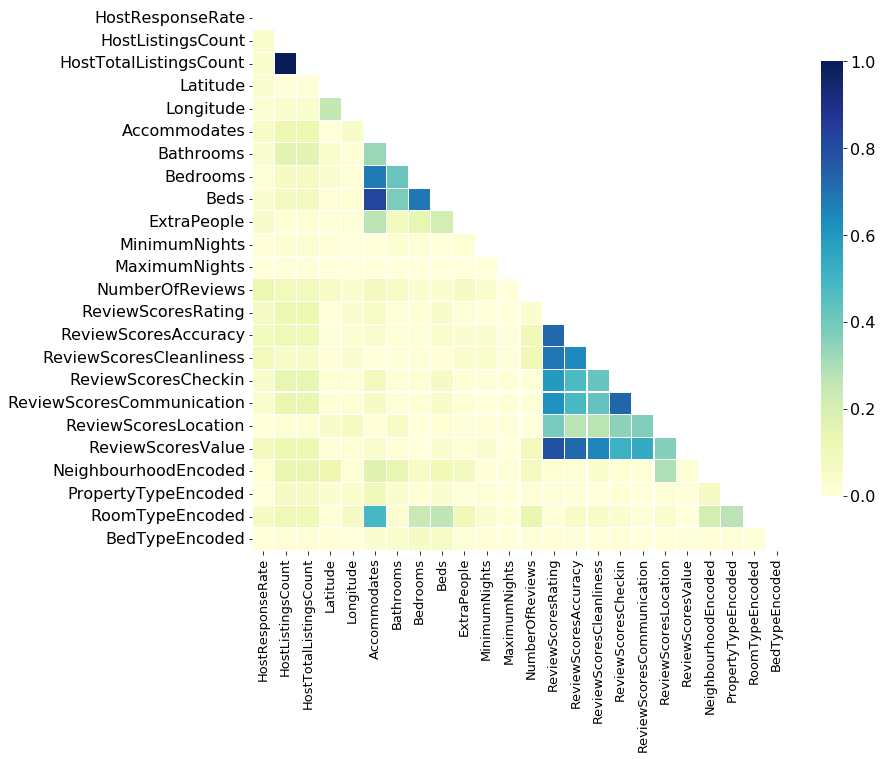

In [38]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(trainAirBnbLimpio.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [39]:
# En esta matriz de correlacion podemos ver que HostTotalListingCount y HostlistingsCount esta fuertemente correlacionadas 
# y esto lo podemos comprobar en el siguiente grafico de dispersion. Por lo que vamos a eliminar una de esas variables

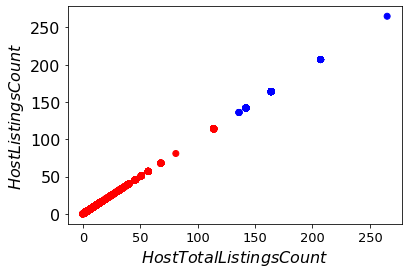

In [40]:
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

plt.scatter(trainAirBnbLimpio['HostTotalListingsCount'], trainAirBnbLimpio['HostListingsCount'], c=trainAirBnbLimpio['HostListingsCount'], cmap=cm_bright)
plt.xlabel("$HostTotalListingsCount$", fontsize=16)
plt.ylabel("$HostListingsCount$", fontsize=16)
plt.show()

In [41]:
# En esta Matriz de Correlacion podemos ver de forma clara cuales son las variables que mas aportan a predecir un precio de renta de un departamento. 
# pero se observa que HostListingsCount y HostTotalListingsCount esta completamente correlacionadas, por lo cual se va a eliminar una de ellas
corr_matrix = trainAirBnbLimpio.corr()
corr_matrix["Price"].sort_values(ascending=False)

Price                        1.000000
Accommodates                 0.580472
Bedrooms                     0.525268
Beds                         0.484907
Bathrooms                    0.347052
NeighbourhoodEncoded         0.315017
HostListingsCount            0.188934
HostTotalListingsCount       0.188934
ReviewScoresLocation         0.121285
ExtraPeople                  0.106108
PropertyTypeEncoded          0.101063
Latitude                     0.065547
ReviewScoresCleanliness      0.057995
ReviewScoresRating           0.044406
BedTypeEncoded               0.034098
ReviewScoresAccuracy         0.033848
MinimumNights                0.030707
ReviewScoresValue            0.010323
ReviewScoresCommunication    0.009142
MaximumNights                0.003059
ReviewScoresCheckin          0.000212
HostResponseRate            -0.005536
Longitude                   -0.025850
NumberOfReviews             -0.033933
RoomTypeEncoded             -0.455562
Name: Price, dtype: float64

In [42]:
# Sacamos un respaldo antes de hacer los cambios
trainAirBnb_data = trainAirBnbLimpio.copy()

In [43]:
# Calculamos el precio promedio en el data set de Test
trainAirBnb_data["Price"].mean()

65.92473688195653

In [44]:
# Eliminadmos las variables que menos aportan en este proceso predictivo, entre ellas HostTotalListingsCount
trainAirBnb_data = trainAirBnb_data.drop(['HostTotalListingsCount',
                        'ExtraPeople','Latitude','ReviewScoresCleanliness','ReviewScoresRating',
                        'ReviewScoresAccuracy','BedTypeEncoded','MinimumNights','MaximumNights','ReviewScoresCommunication',
                        'ReviewScoresValue','ReviewScoresCheckin','HostResponseRate','Longitude','NumberOfReviews','RoomTypeEncoded'], axis=1)


In [45]:
# Finalmente nos quedamos con los Features mas representativos
corr_matrix = trainAirBnb_data.corr()
corr_matrix["Price"].sort_values(ascending=False)

Price                   1.000000
Accommodates            0.580472
Bedrooms                0.525268
Beds                    0.484907
Bathrooms               0.347052
NeighbourhoodEncoded    0.315017
HostListingsCount       0.188934
ReviewScoresLocation    0.121285
PropertyTypeEncoded     0.101063
Name: Price, dtype: float64

In [46]:
trainAirBnb_data.corr()

HostListingsCount  Accommodates  Bathrooms  Bedrooms  \
HostListingsCount              1.000000      0.126879   0.159202  0.073158   
Accommodates                   0.126879      1.000000   0.331865  0.678076   
Bathrooms                      0.159202      0.331865   1.000000  0.421503   
Bedrooms                       0.073158      0.678076   0.421503  1.000000   
Beds                           0.084739      0.822182   0.381930  0.684120   
Price                          0.188934      0.580472   0.347052  0.525268   
ReviewScoresLocation           0.021677      0.005415   0.055187 -0.003268   
NeighbourhoodEncoded           0.136871      0.174103   0.147578  0.059027   
PropertyTypeEncoded            0.072450      0.107860  -0.037793  0.016056   

                          Beds     Price  ReviewScoresLocation  \
HostListingsCount     0.084739  0.188934              0.021677   
Accommodates          0.822182  0.580472              0.005415   
Bathrooms             0.381930  0.347052              0.055187   
Bedrooms              0.684120  0.525268             -0.003268   
Beds                  1.000000  0.484907             -0.016597   
Price                 0.484907  1.000000              0.121285   
ReviewScoresLocation -0.016597  0.121285              1.000000   
NeighbourhoodEncoded  0.106054  0.315017              0.292970   
PropertyTypeEncoded   0.037663  0.101063              0.017584   

                      NeighbourhoodEncoded  PropertyTypeEncoded  
HostListingsCount                 0.136871             0.072450  
Accommodates                      0.174103             0.107860  
Bathrooms                         0.147578            -0.037793  
Bedrooms                          0.059027             0.016056  
Beds                              0.106054             0.037663  
Price                             0.315017             0.101063  
ReviewScoresLocation              0.292970             0.017584  
NeighbourhoodEncoded              1.000000             0.066165  
PropertyTypeEncoded               0.066165             1.000000

In [47]:
# ? scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002886CC82088>,
      dtype=object)

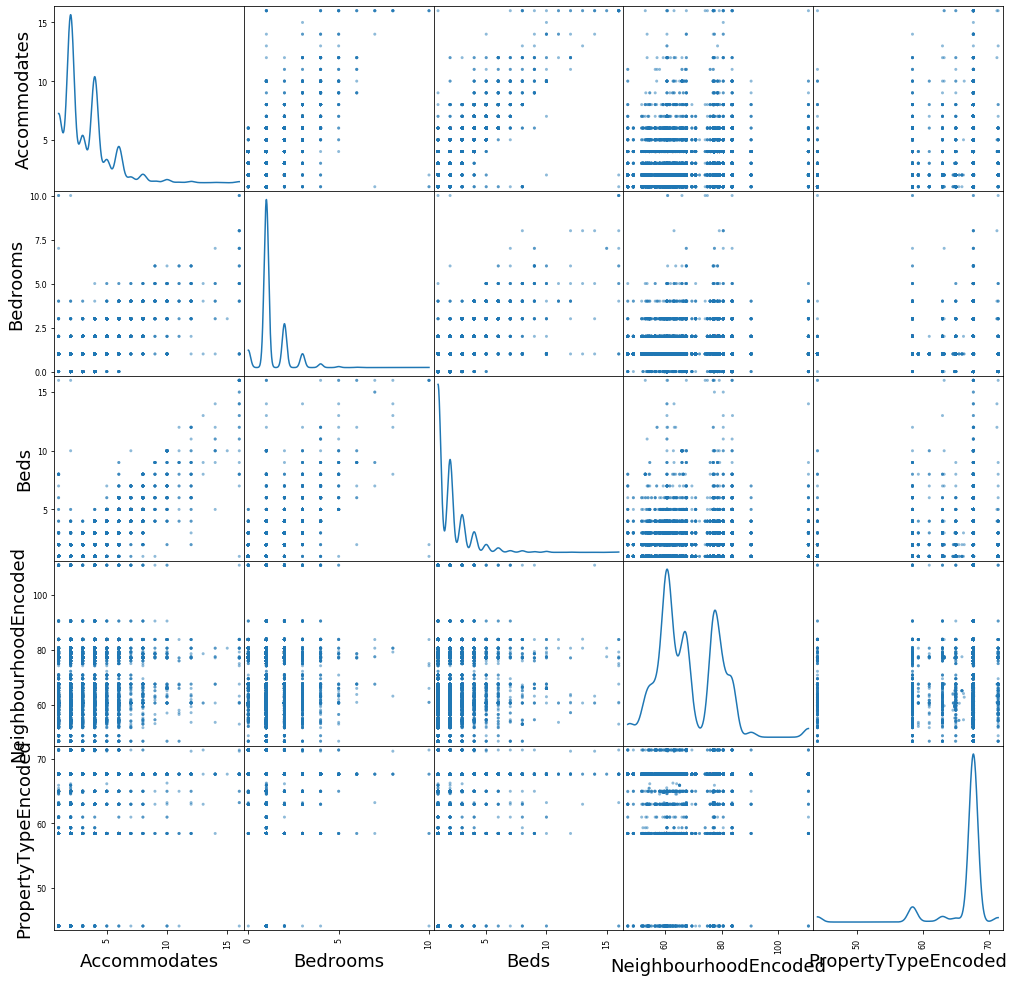

In [48]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["Accommodates", "Bedrooms", "Beds","NeighbourhoodEncoded","PropertyTypeEncoded"]
scatter_matrix(trainAirBnb_data[attributes], figsize=(17, 17),  diagonal='kde', )

In [49]:
#pd.plotting.scatter_matrix(trainAirBnb_data, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
#plt.show()
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
#from pandas.plotting import scatter_matrix
#attributes = ["Price", "Accommodates", "Bedrooms","Beds"]
#scatter_matrix(trainAirBnb_data[attributes], figsize=(12, 8))

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [50]:
dataBnB = trainAirBnb_data.drop("Price", axis=1) # drop labels for training set
dataBnB_num = trainAirBnb_data.drop("Price", axis=1) # drop labels for training set
dataBnB_labels = trainAirBnb_data["Price"].copy()

In [51]:
def desplegar_scores(scores): 
    print("Scores:", scores) 
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

## Nuestro primer modelo va a ser Regresion Lineal

In [52]:
# Vamos un seleccionar un modelo de Regresion para evaluar sin hacer cross validation y ver como se comporta

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(dataBnB_num, dataBnB_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
# Vamos a intentar predecir algunas casas
some_data = dataBnB.iloc[:5]
some_labels = dataBnB_labels.iloc[:5]
print("Predicciones:", lin_reg.predict(some_data))
print("Cuales deberian ser losresultados:", list(some_labels))


Predicciones: [ 51.87634467  74.38365297  82.76149348  81.91893098 147.03888116]
Cuales deberian ser losresultados: [28.0, 58.0, 70.0, 26.0, 70.0]


In [54]:
# Como se puede ver que si trabaja pero las prediccionesno se muy buenas.
# Vamos a medir el RMSE de todo el training usando Scikit-Learn’s mean_squared_error().

In [55]:
from sklearn.metrics import mean_squared_error

airbnb_predictions = lin_reg.predict(dataBnB)
lin_mse = mean_squared_error(dataBnB_labels, airbnb_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

41.74665689124298

In [56]:
# Vamos a aplicar Cross Validation a nuesto modelo lineal

In [57]:
from sklearn.model_selection import cross_val_score 
lin_scores = cross_val_score(lin_reg, dataBnB_num, dataBnB_labels, scoring ="neg_mean_squared_error", cv = 10) 
lin_rmse_scores = np.sqrt(-lin_scores) 
desplegar_scores(lin_rmse_scores)


Scores: [41.62176126 45.80524028 37.47400775 40.61878652 42.61729327 41.29249112
 44.32431803 45.34842392 39.21832537 39.16016439]
Mean: 41.74808119122977
Standard deviation: 2.6396787782982365


## Vamos a probar un Arbol de Desicion

In [58]:
# Para probar este nuevo modelo vamos usar Croos Validation y vamos a dividir el Data Set de Training en 10 Folds
# scikit-Learn dispone de una funcion que nos permite hacer esto.

In [59]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor() 
tree_reg.fit( dataBnB_num, dataBnB_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [60]:
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(tree_reg, dataBnB_num, dataBnB_labels, scoring ="neg_mean_squared_error", cv = 10) 
tree_rmse_scores = np.sqrt(-scores)

# Visualizamos los scores obtenenidos
desplegar_scores(tree_rmse_scores)

Scores: [49.0126544  49.23734763 41.06836168 50.74809836 49.78898292 52.58275716
 52.59338358 47.62562685 42.2229914  50.40401782]
Mean: 48.52842218031488
Standard deviation: 3.7411018915083893


## Por ultimo vamos a probar con Random Forest

In [61]:
from sklearn.ensemble import RandomForestRegressor 

forest_reg = RandomForestRegressor() 
forest_reg.fit( dataBnB_num, dataBnB_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [62]:
airbnbg_predictions = forest_reg.predict(dataBnB_num)
forest_mse = mean_squared_error(dataBnB_labels, airbnbg_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

20.85641398923998

In [63]:
from sklearn.model_selection import cross_val_score
forest_scores = cross_val_score(forest_reg, dataBnB_num, dataBnB_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
desplegar_scores(forest_rmse_scores)

Scores: [40.16411571 42.21537539 32.42149162 40.92394979 38.56045876 38.05742756
 41.84156832 42.17882348 33.94263339 39.47934107]
Mean: 38.978518506970744
Standard deviation: 3.2207970816455695


## Afinamiento de nuestro modelo antes de probar con Test Usando RandomizedSearchCV

In [64]:
# Vamos a usar una serie de Hiperparametros que nos va a permitir ver cual es nuestro mejor modelo, para esto vamos a usa
# GridSearchCV de Scikit-Learn

In [65]:
# from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV


param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, 
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}, 
             ]
forest_reg = RandomForestRegressor() 
grid_search = RandomizedSearchCV(forest_reg, param_grid, cv = 5, scoring ='neg_mean_squared_error', refit=True, return_train_score = True) 
grid_search.fit(dataBnB_num, dataBnB_labels)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [66]:
cvResultsDf = pd.DataFrame(grid_search.cv_results_)
#cvResultsDf.info()
pd.set_option("display.max_colwidth", -1)
print(cvResultsDf.loc[:,"params"])

0    {'n_estimators': 10, 'max_features': 8}                    
1    {'n_estimators': 30, 'max_features': 6}                    
2    {'n_estimators': 3, 'max_features': 2, 'bootstrap': False} 
3    {'n_estimators': 10, 'max_features': 6}                    
4    {'n_estimators': 3, 'max_features': 3, 'bootstrap': False} 
5    {'n_estimators': 30, 'max_features': 8}                    
6    {'n_estimators': 3, 'max_features': 6}                     
7    {'n_estimators': 3, 'max_features': 4}                     
8    {'n_estimators': 10, 'max_features': 4, 'bootstrap': False}
9    {'n_estimators': 3, 'max_features': 2}                     
Name: params, dtype: object


C:\Software\Instalado\miniconda3\envs\keepcoding-Ml-py-3.7.9\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


In [67]:
best_score = grid_search.best_score_
print(best_score)


-1546.6471008926776


In [68]:
best_n_estimators = grid_search.best_params_["n_estimators"]
print(best_n_estimators)


30


In [69]:
best_model = cvResultsDf[cvResultsDf['rank_test_score'] == 1 ]
best_model

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
1  0.313044       0.001824      0.013201         0.000404         

  param_n_estimators param_max_features param_bootstrap  \
1  30                 6                  NaN              

                                    params  split0_test_score  \
1  {'n_estimators': 30, 'max_features': 6} -1619.024367         

   split1_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
1 -1353.555123        ... -1546.647101      160.551196      1                 

   split0_train_score  split1_train_score  split2_train_score  \
1 -415.648222         -453.536652         -436.644749           

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
1 -411.01189          -421.840393         -427.736381        15.52809         

[1 rows x 23 columns]

In [70]:
# Vamos a intentar predecir algunas casas
#some_data_test = testDataBnBFinal.iloc[:5]
#some_labels_test = testDataBnBLabelsFinal.iloc[:5]
# Evaluacion finnal del modelo contra datos de Test
final_model = grid_search.best_estimator_ 
final_predictions = final_model.predict(dataBnB_num) 
final_mse = mean_squared_error( dataBnB_labels, final_predictions) 
final_rmse = np.sqrt(final_mse) 
final_rmse

20.8685669006449

## Evaluacion del Modelo final

Pero antes de evaluar nuestro modelo vamos cargar los datos de Test y prepararlos para entregarlos al modelo

In [71]:
# Cargamos los datos de Test que separamos al inicicio del proceso
testAirbnb = pd.read_csv('./testMadrid.csv', sep=';', decimal='.')


In [72]:
# Eliminamos las no aportan para esta prediccion de precio 
testAirbnb = testAirbnb.drop(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About','Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Verifications', 'Street',
       'Neighbourhood', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Amenities', 'Square Feet', 
       'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included',
       'Calendar Updated', 'Has Availability', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Calendar last Scraped',
       'First Review', 'Last Review','License', 'Jurisdiction Names',
       'Cancellation Policy', 'Calculated host listings count',
       'Reviews per Month', 'Geolocation', 'Features', 'City','Neighbourhood Group Cleansed',
        'Host Response Time'], axis=1)
#testAirbnb.head(5)

In [73]:
testAirbnb.rename(columns={
       'Host Response Rate': 'HostResponseRate', 
       'Host Listings Count': 'HostListingsCount',
       'Host Total Listings Count': 'HostTotalListingsCount', 
       'Neighbourhood Cleansed': 'NeighbourhoodCleansed', 
       'Property Type': 'PropertyType', 
       'Room Type': 'RoomType', 
       'Bed Type': 'BedType', 
       'Extra People': 'ExtraPeople',
       'Minimum Nights': 'MinimumNights', 
       'Maximum Nights': 'MaximumNights', 
       'Number of Reviews': 'NumberOfReviews',
       'Review Scores Rating': 'ReviewScoresRating', 
       'Review Scores Accuracy': 'ReviewScoresAccuracy',
       'Review Scores Cleanliness': 'ReviewScoresCleanliness', 
       'Review Scores Checkin': 'ReviewScoresCheckin',
       'Review Scores Communication': 'ReviewScoresCommunication', 
       'Review Scores Location': 'ReviewScoresLocation',
       'Review Scores Value': 'ReviewScoresValue', 
    }, inplace=True,
    )

In [74]:
# Aplicamos medidas de tendencia central a las columnas numericas para llenar aquellos campos con valores Nan
testAirbnb['HostResponseRate'] = testAirbnb['HostResponseRate'].fillna(round(testAirbnb['HostResponseRate'].mean()))
testAirbnb['HostListingsCount'] = testAirbnb['HostListingsCount'].fillna(round(testAirbnb['HostListingsCount'].mean()))
testAirbnb['HostTotalListingsCount'] = testAirbnb['HostTotalListingsCount'].fillna(round(testAirbnb['HostTotalListingsCount'].mean()))
testAirbnb['Bathrooms'] = testAirbnb['Bathrooms'].fillna(testAirbnb['Bathrooms'].median())
testAirbnb['Bedrooms'] = testAirbnb['Bedrooms'].fillna(testAirbnb['Bedrooms'].median())
testAirbnb['Beds'] = testAirbnb['Beds'].fillna(testAirbnb['Beds'].median())
testAirbnb['Price'] = testAirbnb['Price'].fillna(round(testAirbnb['Price'].mean()))
testAirbnb['ReviewScoresRating'] = testAirbnb['ReviewScoresRating'].fillna(round(testAirbnb['ReviewScoresRating'].mean()))
testAirbnb['ReviewScoresAccuracy'] = testAirbnb['ReviewScoresAccuracy'].fillna(round(testAirbnb['ReviewScoresAccuracy'].mean()))
testAirbnb['ReviewScoresCleanliness'] = testAirbnb['ReviewScoresCleanliness'].fillna(round(testAirbnb['ReviewScoresCleanliness'].mean()))
testAirbnb['ReviewScoresCheckin'] = testAirbnb['ReviewScoresCheckin'].fillna(round(testAirbnb['ReviewScoresCheckin'].mean()))
testAirbnb['ReviewScoresCommunication'] = testAirbnb['ReviewScoresCommunication'].fillna(round(testAirbnb['ReviewScoresCommunication'].mean()))
testAirbnb['ReviewScoresLocation'] = testAirbnb['ReviewScoresLocation'].fillna(round(testAirbnb['ReviewScoresLocation'].mean()))
testAirbnb['ReviewScoresValue'] = testAirbnb['ReviewScoresValue'].fillna(round(testAirbnb['ReviewScoresValue'].mean()))

In [75]:
# Transformamos los tipos de datos a valores numericos
#testSoloInt=testAirbnb.select_dtypes(include=['int64'])
#testSoloInt=testAirbnb.select_dtypes(include=['float64'])
#testSoloInt=testAirbnb.select_dtypes(include=['object'])

In [76]:
#testSoloInt.info()

In [77]:
# Sacamos una copia del dataSet Procesado hasta aqui
testHot = testAirbnb.copy()

In [78]:
# Sacamos el promedio total de la variable Price
testPrecioPromedio = testHot['Price'].mean()

In [79]:
# Calculamos los valores y el promedio de cada grupo de Barrio
agg = testHot.groupby('NeighbourhoodCleansed')['Price'].agg(['count', 'mean'])
counts = agg['count']
means = agg['mean']
peso = 100
# Calculamos el precio mas suavisado
smooth = (counts * means + peso * testPrecioPromedio)/(counts + peso)
testHot.loc[:, 'NeighbourhoodEncoded'] = testHot['NeighbourhoodCleansed'].map(smooth)

In [80]:
# Calculamos los valores y el promedio de cada grupo de Barrio
agg = testHot.groupby('PropertyType')['Price'].agg(['count', 'mean'])
counts = agg['count']
means = agg['mean']
peso = 100
# Calculamos el precio mas suavisado
smooth = (counts * means + peso * precioPromedio)/(counts + peso)
testHot.loc[:, 'PropertyTypeEncoded'] = testHot['PropertyType'].map(smooth)

In [81]:
from sklearn.preprocessing import LabelEncoder
testHot['RoomTypeEncoded'] = LabelEncoder().fit_transform(testHot.RoomType)
testHot['BedTypeEncoded'] = LabelEncoder().fit_transform(testHot.BedType)

In [82]:
# Sacamos un respaldo del Data Set
testAirBnbLimpio = testHot.copy()

In [83]:
# Eliminamos los columnas que son tipo texto
testAirBnbLimpio = testAirBnbLimpio.drop(['NeighbourhoodCleansed', 'PropertyType', 'RoomType', 'BedType'], axis=1)

In [84]:
# Sacamos un respaldo antes de hacer los cambios, para eliminar las columnas que no aporta mucho al modelo predictivo
testAirBnbDataSet = testAirBnbLimpio.copy()

In [85]:
# Calculamos el precio promedio en el data set de Test
testAirBnbDataSet["Price"].mean()

66.53633610900833

In [86]:
# Eliminadmos las variables que menos aportan en este proceso predictivo, entre ellas HostTotalListingsCount
testAirBnbDataSet = testAirBnbDataSet.drop(['HostTotalListingsCount',
                        'ExtraPeople','Latitude','ReviewScoresCleanliness','ReviewScoresRating',
                        'ReviewScoresAccuracy','BedTypeEncoded','MinimumNights','MaximumNights','ReviewScoresCommunication',
                        'ReviewScoresValue','ReviewScoresCheckin','HostResponseRate','Longitude','NumberOfReviews','RoomTypeEncoded'], axis=1)


In [87]:
# Finalmente nos quedamos con los Features mas representativos
corr_matrix = testAirBnbDataSet.corr()
corr_matrix["Price"].sort_values(ascending=False)

Price                   1.000000
Accommodates            0.604895
Bedrooms                0.551697
Beds                    0.474900
Bathrooms               0.368138
NeighbourhoodEncoded    0.340441
HostListingsCount       0.215551
ReviewScoresLocation    0.127298
PropertyTypeEncoded     0.087121
Name: Price, dtype: float64

In [88]:
testDataBnBFinal = testAirBnbDataSet.drop("Price", axis=1) # drop labels for training set
testDataBnBLabelsFinal = testAirBnbDataSet["Price"].copy()

## Evaluamos nuestro modelo de Regresion Lineal con los Datos de Test

In [89]:
# Vamos a intentar predecir algunas casas
some_data_test = testDataBnBFinal.iloc[:5]
some_labels_test = testDataBnBLabelsFinal.iloc[:5]
print("Predicciones:", lin_reg.predict(some_data_test))
print("Cuales deberian ser losresultados:", list(some_labels_test))


Predicciones: [94.32299961 45.31510317 64.35297567 63.84741521 39.56427436]
Cuales deberian ser losresultados: [163.0, 40.0, 55.0, 65.0, 15.0]


In [90]:
from sklearn.metrics import mean_squared_error

airbnb_predictions_test = lin_reg.predict(some_data_test)
lin_mse = mean_squared_error(some_labels_test, airbnb_predictions_test)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

32.97572102279538

## Aplicando Lasso Regularizacion al modelo Lineal
Al aplicar Lasso al modelo lineal vemos que el rmse empeora  generando Overfitting

In [91]:
from sklearn.linear_model import Lasso
# ...
alpha = 1e-20
lasso = Lasso(alpha = alpha).fit(dataBnB_num,dataBnB_labels)
w = lasso.coef_
norm_w2 = np.dot(w,w.T)
    
# predicción
y_hat = lasso.predict(testDataBnBFinal)

# error
error_test = np.mean(np.power(testDataBnBLabelsFinal - y_hat,2)) 
np.sqrt(error_test)

C:\Software\Instalado\miniconda3\envs\keepcoding-Ml-py-3.7.9\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11508464.176782427, tolerance: 4139.843318846067
  positive)


39.54829075228164

## Evaluamos nuestro modelo de Arbol de Dessicion con Datos de Test

In [92]:
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(tree_reg, testDataBnBFinal, testDataBnBLabelsFinal, scoring ="neg_mean_squared_error", cv = 10) 
tree_rmse_scores = np.sqrt(-scores)

# Visualizamos los scores obtenenidos
desplegar_scores(tree_rmse_scores)

Scores: [53.34192729 62.03134867 46.06937352 39.64934079 37.96524014 43.42123289
 53.84424933 47.59809421 32.41332609 62.07494515]
Mean: 47.8409078075319
Standard deviation: 9.463875707092026


## Evaluamos el mejor modelo conseguido con GridRamdomizeSearchCV con los Datos de Test

In [97]:
# Evaluacion finnal del modelo contra datos de Test
final_model = grid_search.best_estimator_ 
#final_predictions = final_model.predict(dataBnB_num) 
#final_mse = mean_squared_error( dataBnB_labels, final_predictions) 
final_predictions = final_model.predict(testDataBnBFinal) 
final_mse = mean_squared_error( testDataBnBLabelsFinal, final_predictions) 
final_rmse = np.sqrt(final_mse) 

In [98]:
print(final_predictions)

[145.3         37.98666667  45.93555556 ...  64.83333333  54.31777778
  73.71666667]


In [99]:
testDataBnBLabelsFinal

0       163.0
1       40.0 
2       55.0 
3       65.0 
4       15.0 
        ...  
2637    75.0 
2638    60.0 
2639    50.0 
2640    60.0 
2641    53.0 
Name: Price, Length: 2642, dtype: float64

In [100]:
final_rmse

32.875180444096145

## Evaluamos el modelo de Random Forest Contra los datos de Test

In [101]:
from sklearn.ensemble import RandomForestRegressor 

forest_reg = RandomForestRegressor() 
forest_reg.fit( dataBnB_num, dataBnB_labels)

testAirbnb_predictions = forest_reg.predict(testDataBnBFinal)
forest_mse = mean_squared_error(testDataBnBLabelsFinal, testAirbnb_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

32.99172817978975

In [102]:
from sklearn.model_selection import cross_val_score
forest_scores = cross_val_score(forest_reg, testDataBnBFinal, testDataBnBLabelsFinal,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
desplegar_scores(forest_rmse_scores)

Scores: [36.58369816 42.60230565 29.84717669 31.53777834 31.40173879 37.03756554
 47.67649835 33.17142558 24.9900032  51.86237758]
Mean: 36.67105678776258
Standard deviation: 7.978682068554452


## Conclusiones Finales

En este Notoebook, finalmente evaluamos 3 modelos
1 .- Linear Regression
2.- Random Forest
3.- Ramdom Forest Aplicando Grid SearchCV
4.- Arbol de desicion

*Para esto armamos un dataframe con los datos recopilados durante el proceso de Training y Testing de los diferentes modelos*

In [103]:
import pandas as pd
compracionModelos_df = pd.DataFrame()
compracionModelos_df["Modelo"] = None
compracionModelos_df["Train"] = None
compracionModelos_df["Test"] = None

modelos = ['Regresion Lineal', 'Randon forest', 'Random Forest-GridSearchCV', 'Arbol de Desicion']
entraining = [41.74, 20.84, 21.05, 48.94]
entesting = [32.97, 33.52, 31.92, 48.65]

compracionModelos_df['Modelo'] = modelos
compracionModelos_df['Train'] = entraining
compracionModelos_df['Test'] = entesting
print(compracionModelos_df)

                       Modelo  Train   Test
0  Regresion Lineal            41.74  32.97
1  Randon forest               20.84  33.52
2  Random Forest-GridSearchCV  21.05  31.92
3  Arbol de Desicion           48.94  48.65


### *Mis conclusiones son las siguientes:*

- A diferencia del modelo de Regresion Lineal vemos que el RMSE empeora, lo cual esta generando Overfitting, esto se puede estar dando a que el modelo esta interpretando que existe mucho ruido dentro del Dataset de entrenamiento, sin embargo esto no es asi, lo que se puede observar en el grafico de barras de todos los barrios de Madrid es que apenas el 10% tienen suficientes datos para entrenar el modelo el resto de barios los datos son muy pocos, lo cual se esta interpretando como ruido y al probar con nuestros datos de TEST el RMSE es peor que el de Training.

- Otro dato Interesante es que uno de los mejores modelos que generaliza es el ($\ RandomForest GridSearchCV $), debido a que en este modelo usamos 
Cross Validation en los datos para entrenar el modelo, es el mejor score que he conseguido en datos de Training como Test.

